# Overview
- Want to understand the differential water temperature going in and out of the magnet and the magnet power supply. This will help confirm/update power requirement numbers for an updated 2-zone chiller quote.
- Will use magnet ramp data, after the chiller failed (datetime query, date > 2021-03-08 07:50) and also pole-to-pole data for some of the lower currents

# Imports and Data Load

In [1]:
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype
#from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

# local imports
from plotting import config_plots, datetime_plt
from load_pattern_slow import *
#from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d
from mu2e.mu2eplots import mu2e_plot3d

In [2]:
config_plots()

In [3]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

In [4]:
plotdir= '/home/ckampa/data/hallprobecalib_extras/plots/chiller_calculations/'

In [52]:
slowfile_ramp = ddir+'2021-02-24 094822slow.txt'
#slowfile_pole1 = ddir+'2021-06-11 150830slow.txt' # Friday 6/11 through the weekend, 600k, tripped 6/13
#slowfile_pole2 = ddir+'2021-06-14 093340slow.txt' # 600k pole to pole
slowfile_pole3 = ddir+'2021-06-14 104016slow.txt' # 192, 208, 224, 240 A -- tripped
slowfile_pole4 = ddir+'2021-06-14 151158slow.txt' # 224 A, overnight
slowfile_pole5 = ddir+'2021-06-15 073803slow.txt' # 224, 128, 144, 160, 176, 192 A
slowfile_pole6 = ddir+'2021-06-15 145241slow.txt' # 192 A, overnight

In [7]:
# ramp data
df = load_data(slowfile_ramp)
df = df.loc['2021-03-08 07:45':]

In [75]:
df_6_14 = load_data(slowfile_pole3)
df_6_15 = load_data(slowfile_pole5)
# df_6_14 = load_data(slowfile_pole4)
# df_6_15 = load_data(slowfile_pole6)

# Plots and Calculations

In [76]:
df.columns

Index(['Time', 'Magnet Current [A]', 'Magnet Voltage [V]', 'Coil 1 (new)',
       'Coil 2 (old)', 'LCW in Coil1', 'LCW out Coil 1', 'LCW in Coil 2',
       'LCW out Coil 2', 'Yoke', 'Hall Element', 'Floor', 'Roof',
       'Yoke (center magnet)', 'Parameter HVAC sensor', 'Chamber Wall CH13',
       'Chamber Wall CH14', 'Chamber Wall CH15', 'Chamber Wall CH16',
       'Chamber Wall CH17', 'Chamber Wall CH18', 'Chamber Wall CH19',
       'Chamber Wall CH20', 'Desk Ambient', 'Outlet Strip Ambient',
       'Top fo Orange PS Ambient', 'Spare Ambient on desk',
       'TrippLite Ambient 3ft high', 'TrippLite Ambient Floor', 'PS internal',
       'PS Vent1', 'PS Vent2', 'TrippLite HVAC supply',
       'Tripplite HVAC exhaust', 'LCW to PS', 'LCW in barrel', 'ICW in',
       'ICW HE1 out', 'ICW He2 out', 'LCW return magnet', 'LCW to barrel',
       'LCW from PS', 'LCW to magnet', 'NMR [T]', 'NMR [FFT]',
       'DF0000000D5E803A_Raw_X', 'DF0000000D5E803A_Raw_Y',
       'DF0000000D5E803A_Raw_Z', 'C

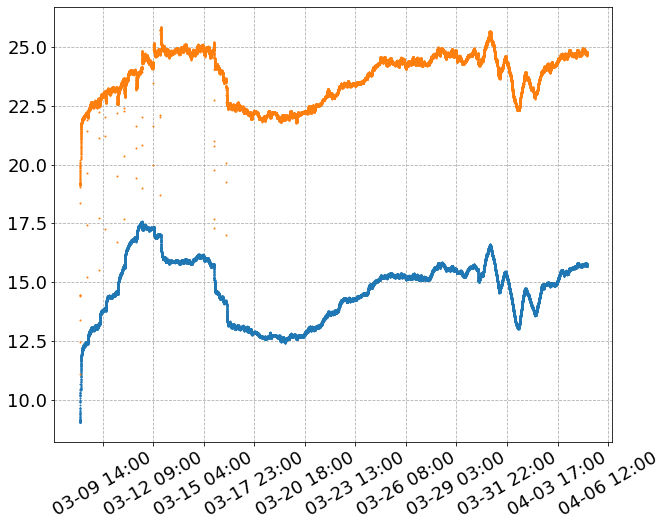

In [14]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df.index, df['LCW to PS'], s=1, nmaj=10)
ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

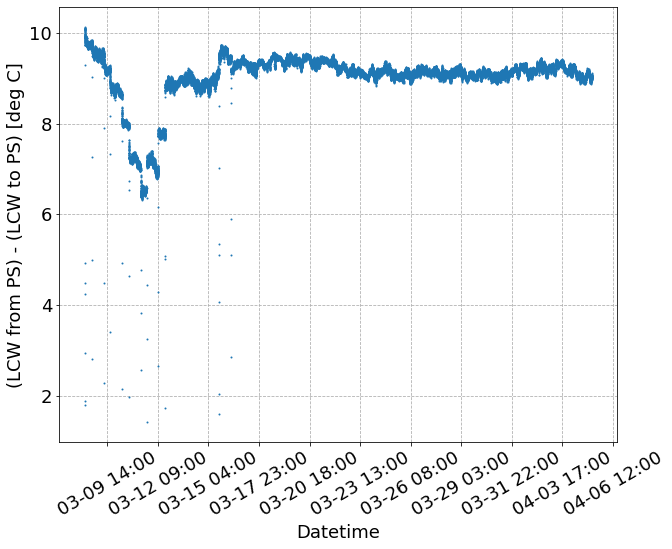

In [95]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df.index, df['LCW from PS']-df['LCW to PS'], s=1, nmaj=10)
ax.set_xlabel('Datetime')
ax.set_ylabel('(LCW from PS) - (LCW to PS) [deg C]');
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

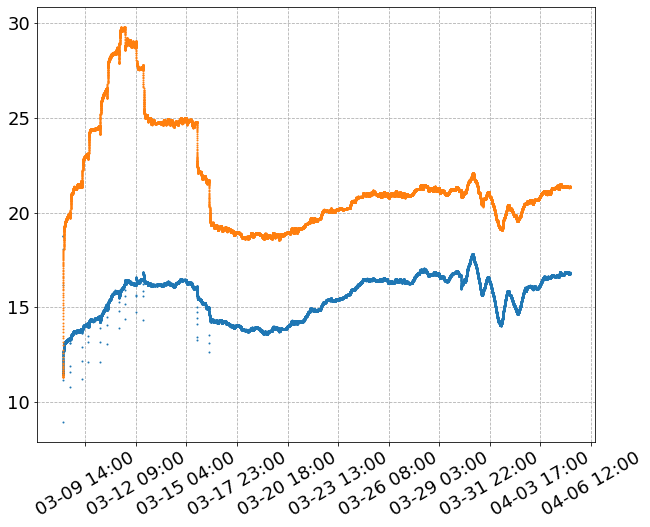

In [28]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df.index, df['LCW to magnet'], s=1, nmaj=10)
ax = datetime_plt(ax, df.index, df['LCW return magnet'], s=1, nmaj=10)

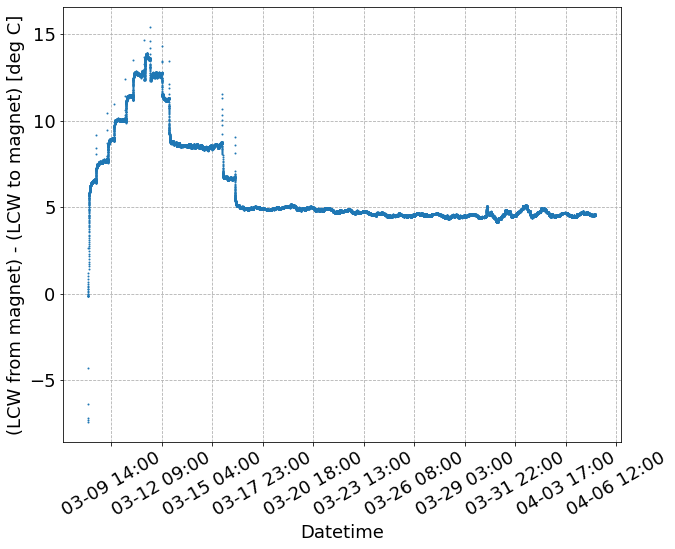

In [94]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df.index, df['LCW return magnet']-df['LCW to magnet'], s=1, nmaj=10)
ax.set_xlabel('Datetime')
ax.set_ylabel('(LCW from magnet) - (LCW to magnet) [deg C]');
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

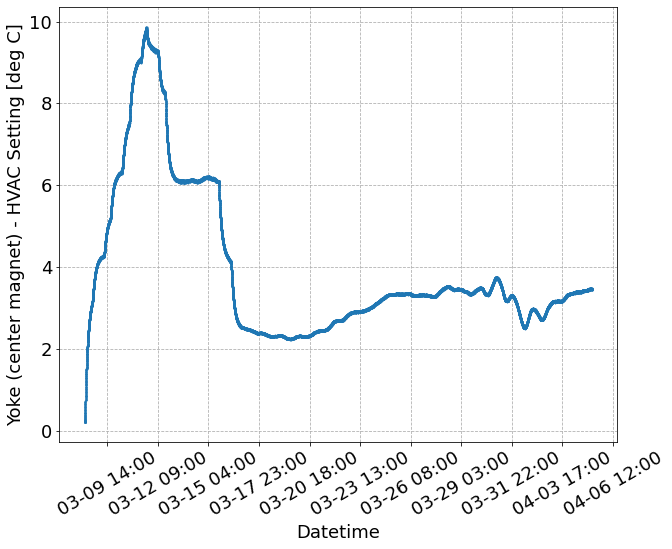

In [97]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df.index, df['Yoke (center magnet)'] - 15., s=1, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)
ax.set_xlabel('Datetime')
ax.set_ylabel('Yoke (center magnet) - HVAC Setting [deg C]');

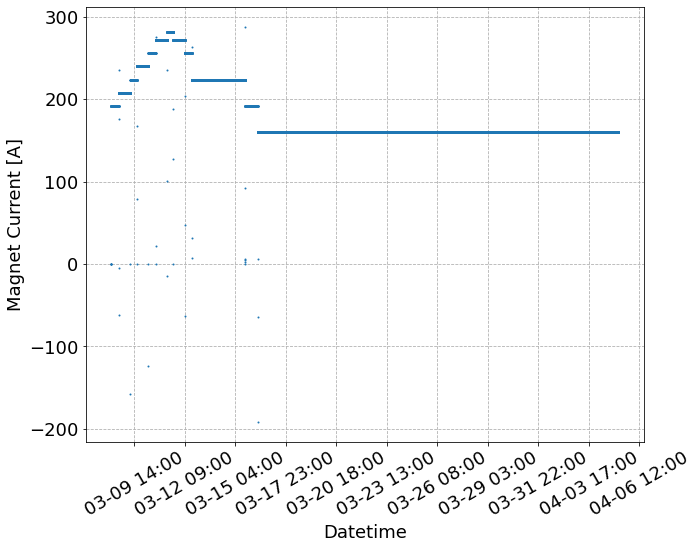

In [96]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df.index, df['Magnet Current [A]'], s=1, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)
ax.set_xlabel('Datetime')
ax.set_ylabel('Magnet Current [A]');

Text(0.5, 0.98, 'Magnet Ramp (After Chiller Failed)')

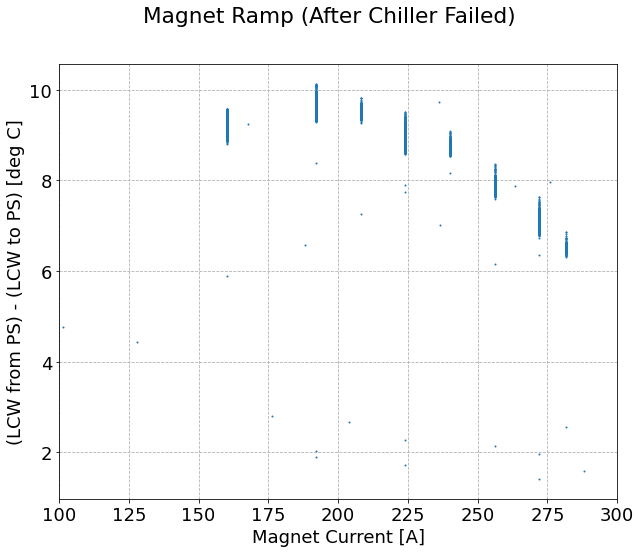

In [44]:
fig, ax = plt.subplots()
ax.scatter(df['Magnet Current [A]'], df['LCW from PS']-df['LCW to PS'], s=1)
ax.set_xlim([100, 300])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('(LCW from PS) - (LCW to PS) [deg C]');
fig.suptitle('Magnet Ramp (After Chiller Failed)')

Text(0.5, 0.98, 'Magnet Ramp (After Chiller Failed)')

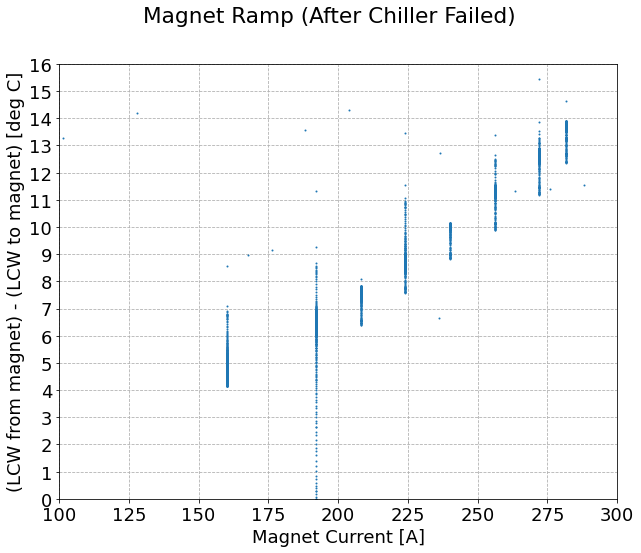

In [50]:
fig, ax = plt.subplots()
ax.scatter(df['Magnet Current [A]'], df['LCW return magnet']-df['LCW to magnet'], s=1)
ax.set_xlim([100, 300])
ax.set_yticks(np.linspace(0, 16, 17))
ax.set_ylim([0, 16])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('(LCW from magnet) - (LCW to magnet) [deg C]');
fig.suptitle('Magnet Ramp (After Chiller Failed)')

Text(0.5, 0.98, 'Magnet Ramp (After Chiller Failed)')

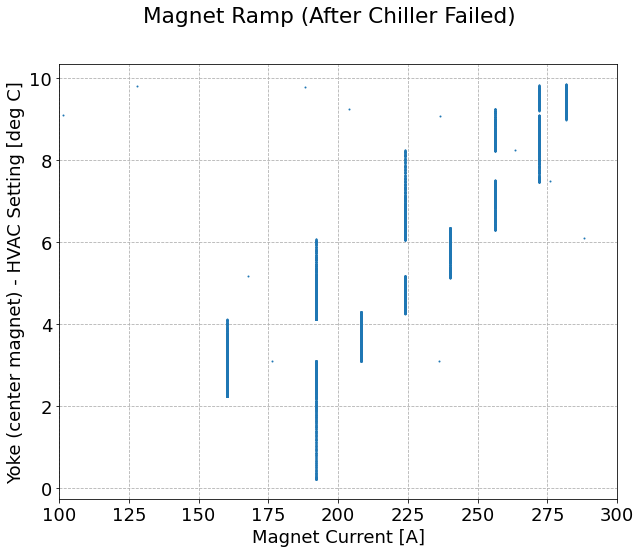

In [65]:
fig, ax = plt.subplots()
ax.scatter(df['Magnet Current [A]'], df['Yoke (center magnet)']-15, s=1)
ax.set_xlim([100, 300])
#ax.set_yticks(np.linspace(0, 16, 17))
#ax.set_ylim([0, 16])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('Yoke (center magnet) - HVAC Setting [deg C]');
fig.suptitle('Magnet Ramp (After Chiller Failed)')

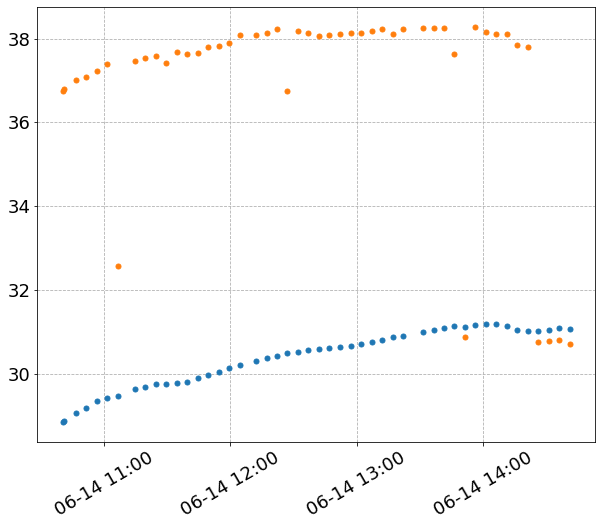

In [77]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_14.index, df_6_14['LCW to PS'],s=5, nmaj=10)
ax = datetime_plt(ax, df_6_14.index, df_6_14['LCW from PS'], s=5, nmaj=10)

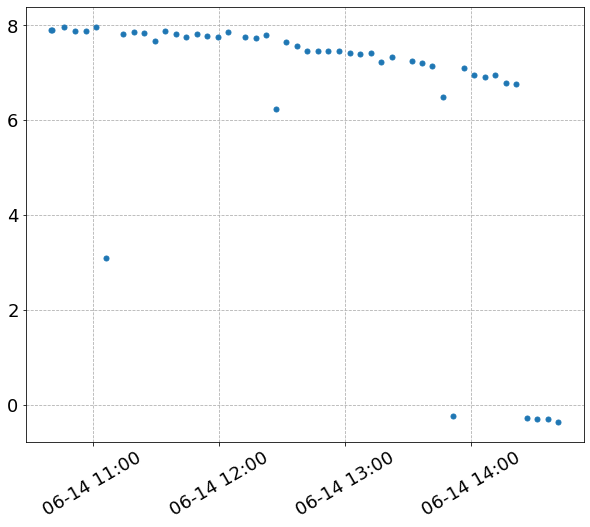

In [78]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_14.index, df_6_14['LCW from PS']-df_6_14['LCW to PS'], s=5, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

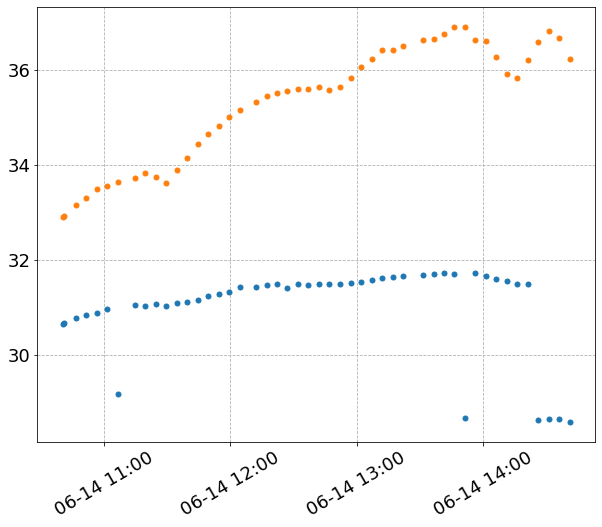

In [79]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_14.index, df_6_14['LCW to magnet'],s=5, nmaj=10)
ax = datetime_plt(ax, df_6_14.index, df_6_14['LCW return magnet'], s=5, nmaj=10)

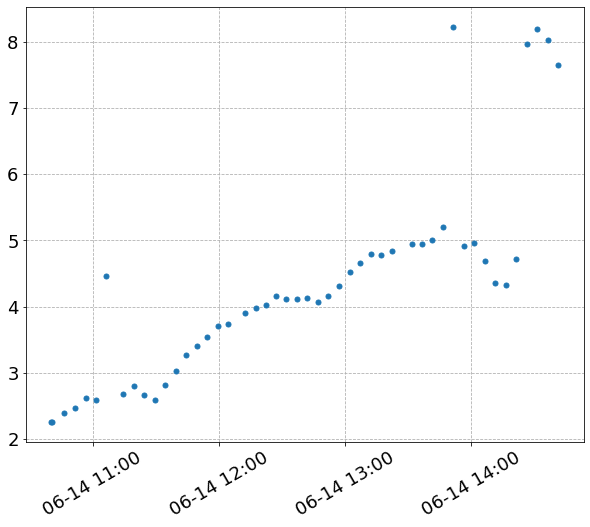

In [80]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_14.index, df_6_14['LCW return magnet']-df_6_14['LCW to magnet'], s=5, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

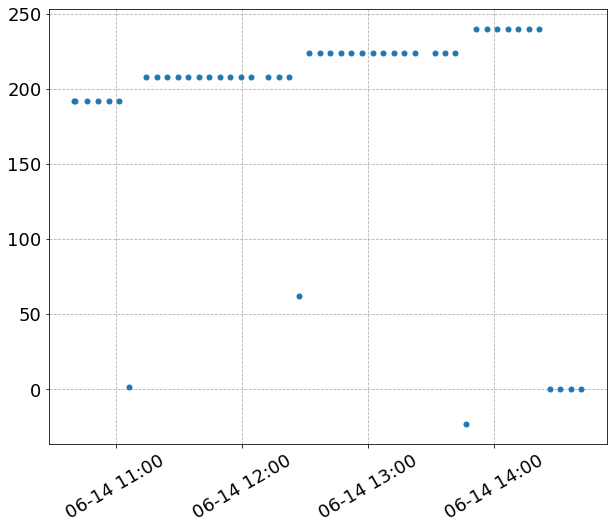

In [81]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_14.index, df_6_14['Magnet Current [A]'], s=5, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

Text(0.5, 0.98, 'Pole-to-Pole Measurements')

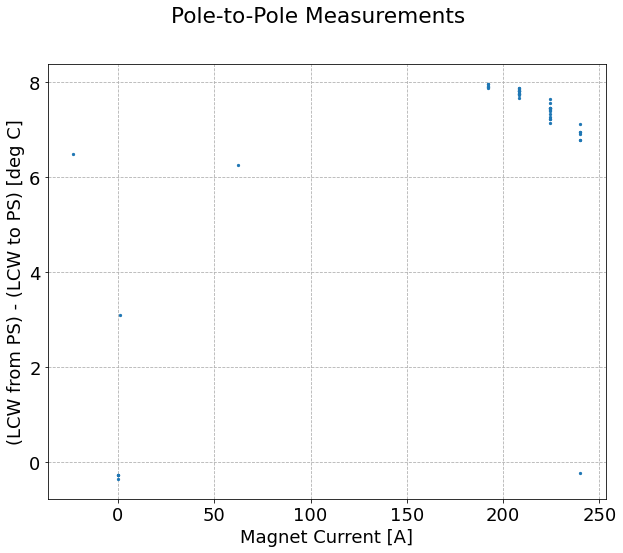

In [82]:
fig, ax = plt.subplots()
ax.scatter(df_6_14['Magnet Current [A]'], df_6_14['LCW from PS']-df_6_14['LCW to PS'], s=5)
#ax.set_xlim([100, 300])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('(LCW from PS) - (LCW to PS) [deg C]');
fig.suptitle('Pole-to-Pole Measurements')

Text(0.5, 0.98, 'Pole-to-Pole Measurements')

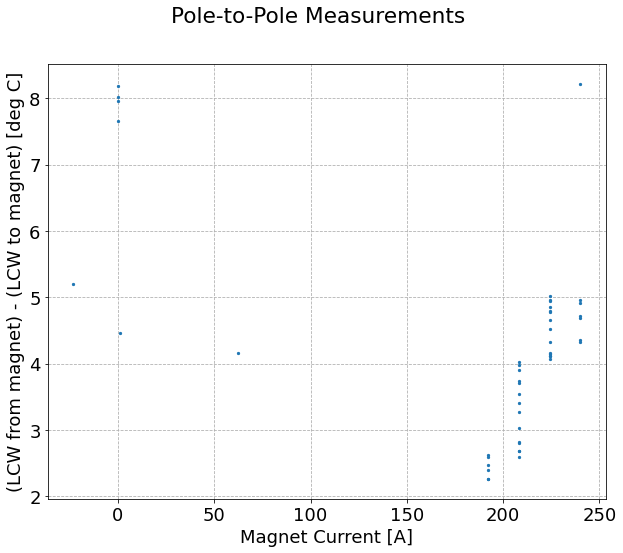

In [84]:
fig, ax = plt.subplots()
ax.scatter(df_6_14['Magnet Current [A]'], df_6_14['LCW return magnet']-df_6_14['LCW to magnet'], s=5)
# ax.set_xlim([100, 300])
# ax.set_yticks(np.linspace(0, 16, 17))
# ax.set_ylim([0, 16])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('(LCW from magnet) - (LCW to magnet) [deg C]');
fig.suptitle('Pole-to-Pole Measurements')

Text(0.5, 0.98, 'Pole-to-Pole Measurements')

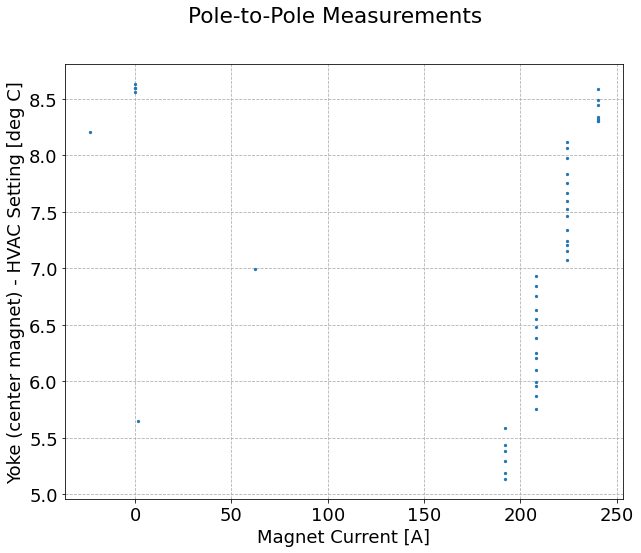

In [85]:
fig, ax = plt.subplots()
ax.scatter(df_6_14['Magnet Current [A]'], df_6_14['Yoke (center magnet)']-15, s=5)
#ax.set_xlim([100, 300])
#ax.set_yticks(np.linspace(0, 16, 17))
#ax.set_ylim([0, 16])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('Yoke (center magnet) - HVAC Setting [deg C]');
fig.suptitle('Pole-to-Pole Measurements')

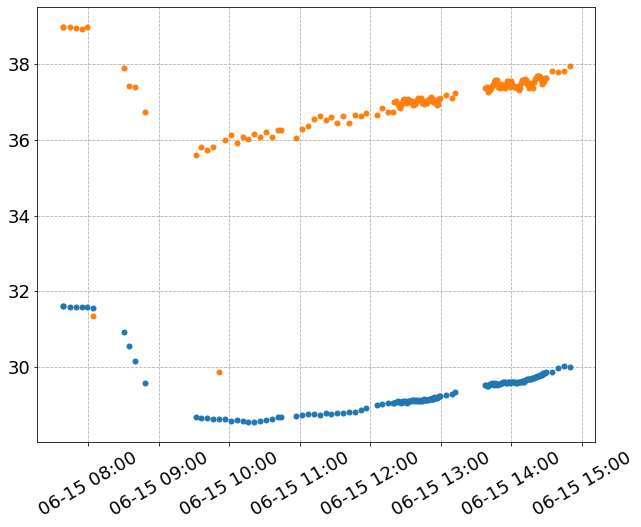

In [86]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_15.index, df_6_15['LCW to PS'],s=5, nmaj=10)
ax = datetime_plt(ax, df_6_15.index, df_6_15['LCW from PS'], s=5, nmaj=10)

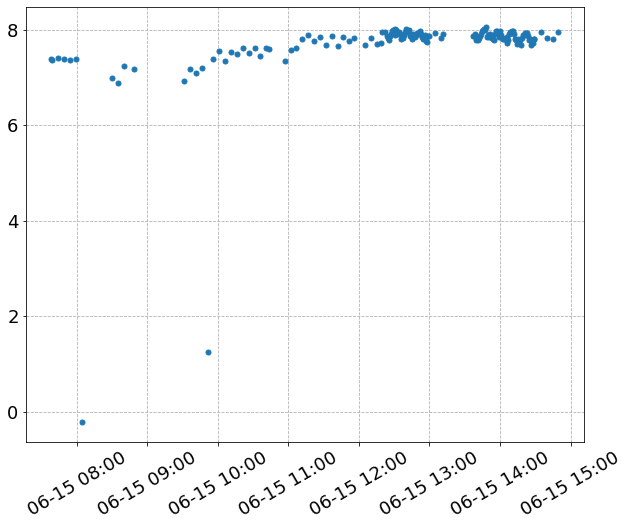

In [87]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_15.index, df_6_15['LCW from PS']-df_6_15['LCW to PS'], s=5, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

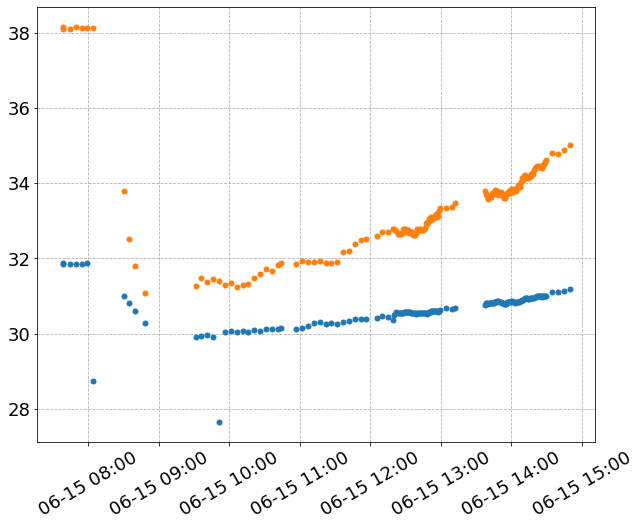

In [88]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_15.index, df_6_15['LCW to magnet'],s=5, nmaj=10)
ax = datetime_plt(ax, df_6_15.index, df_6_15['LCW return magnet'], s=5, nmaj=10)

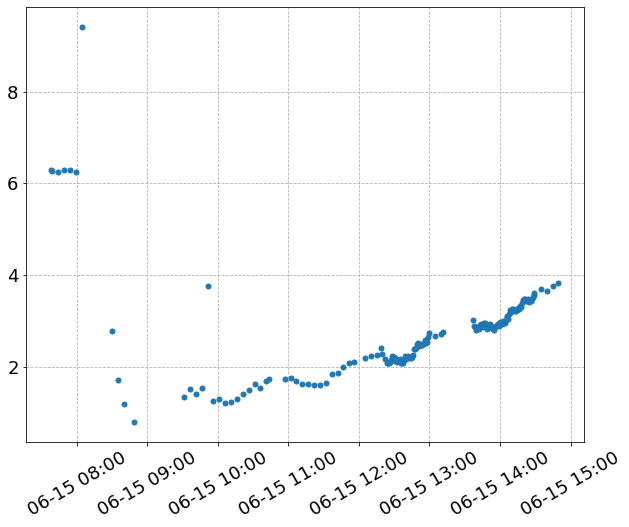

In [89]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_15.index, df_6_15['LCW return magnet']-df_6_15['LCW to magnet'], s=5, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

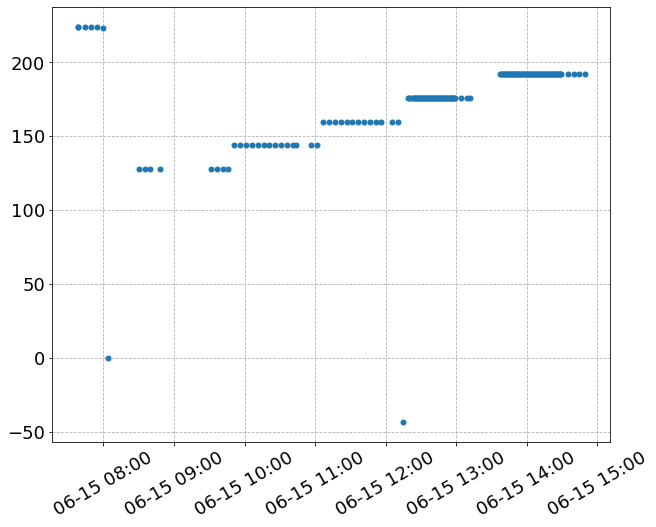

In [90]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_6_15.index, df_6_15['Magnet Current [A]'], s=5, nmaj=10)
#ax = datetime_plt(ax, df.index, df['LCW from PS'], s=1, nmaj=10)

Text(0.5, 0.98, 'Pole-to-Pole Measurements')

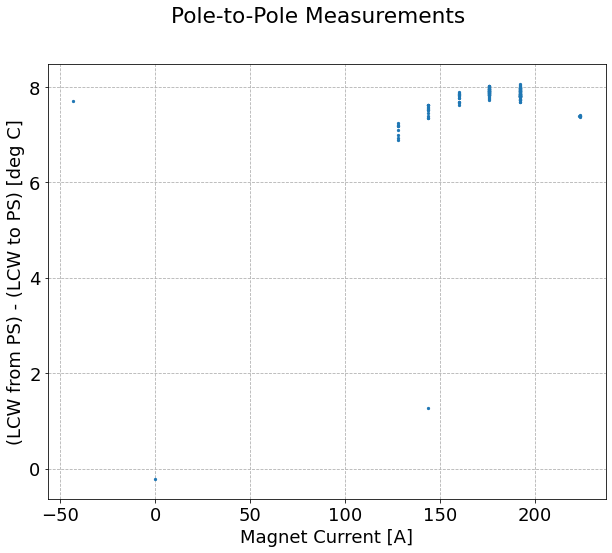

In [91]:
fig, ax = plt.subplots()
ax.scatter(df_6_15['Magnet Current [A]'], df_6_15['LCW from PS']-df_6_15['LCW to PS'], s=5)
#ax.set_xlim([100, 300])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('(LCW from PS) - (LCW to PS) [deg C]');
fig.suptitle('Pole-to-Pole Measurements')

Text(0.5, 0.98, 'Pole-to-Pole Measurements')

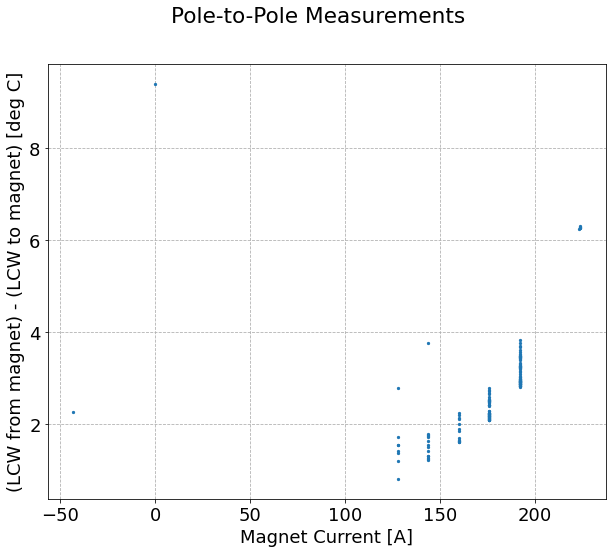

In [92]:
fig, ax = plt.subplots()
ax.scatter(df_6_15['Magnet Current [A]'], df_6_15['LCW return magnet']-df_6_15['LCW to magnet'], s=5)
# ax.set_xlim([100, 300])
# ax.set_yticks(np.linspace(0, 16, 17))
# ax.set_ylim([0, 16])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('(LCW from magnet) - (LCW to magnet) [deg C]');
fig.suptitle('Pole-to-Pole Measurements')

Text(0.5, 0.98, 'Pole-to-Pole Measurements')

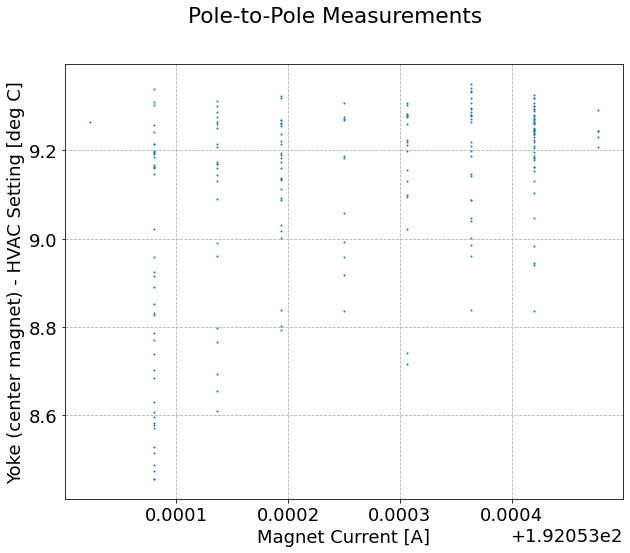

In [74]:
fig, ax = plt.subplots()
ax.scatter(df_6_15['Magnet Current [A]'], df_6_15['Yoke (center magnet)']-15, s=1)
#ax.set_xlim([100, 300])
#ax.set_yticks(np.linspace(0, 16, 17))
#ax.set_ylim([0, 16])
ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel('Yoke (center magnet) - HVAC Setting [deg C]');
fig.suptitle('Pole-to-Pole Measurements')